In [1]:
library(RcppRoll)
library(zoo)
library(scales)
library(corrplot)
library(dplyr)
library(ggcorrplot)
library(GGally)
library(lubridate)
library(forecast)
library(tidyr)
library(data.table)
library(dplyr)
library(ggplot2)
library(stats)
library(fpp)
library(data.table)
require(data.table)
require(lubridate)
require(forecast)
require(skimr)
require(repr)


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


corrplot 0.92 loaded


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: 'data.table'


The following objects are masked from 'package:lubridate':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from 'package:dplyr':

    between, first, last


The following objects are masked from 'package:zoo':

   

In [2]:
data_path='data.csv'
data=fread(data_path)
head(data)
str(data)

DateTime,renewable_ratio,priceEur,Difference_24,Difference_168,Workday,Workday_168,Workday_24,forecast,BV Forecast
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
2021-01-14 00:00:00,0.04073709,35.26,1.16,2.17,1,1,1,27.4,4187.97
2021-01-14 01:00:00,0.04586432,35.13,4.79,0.94,1,1,1,30.1,3975.82
2021-01-14 02:00:00,0.05103432,34.87,2.32,5.17,1,1,1,37.3,3885.02
2021-01-14 03:00:00,0.05995258,34.58,7.66,5.35,1,1,1,41.0,3589.79
2021-01-14 04:00:00,0.06207705,34.57,6.45,7.32,1,1,1,52.6,3137.07
2021-01-14 05:00:00,0.07138521,34.53,0.32,7.28,1,1,1,67.9,2717.61


Classes 'data.table' and 'data.frame':	28752 obs. of  10 variables:
 $ DateTime       : POSIXct, format: "2021-01-14 00:00:00" "2021-01-14 01:00:00" ...
 $ renewable_ratio: num  0.0407 0.0459 0.051 0.06 0.0621 ...
 $ priceEur       : num  35.3 35.1 34.9 34.6 34.6 ...
 $ Difference_24  : num  1.16 4.79 2.32 7.66 6.45 ...
 $ Difference_168 : num  2.17 0.94 5.17 5.35 7.32 ...
 $ Workday        : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Workday_168    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Workday_24     : num  1 1 1 1 1 1 1 1 1 1 ...
 $ forecast       : num  27.4 30.1 37.3 41 52.6 ...
 $ BV Forecast    : num  4188 3976 3885 3590 3137 ...
 - attr(*, ".internal.selfref")=<externalptr> 


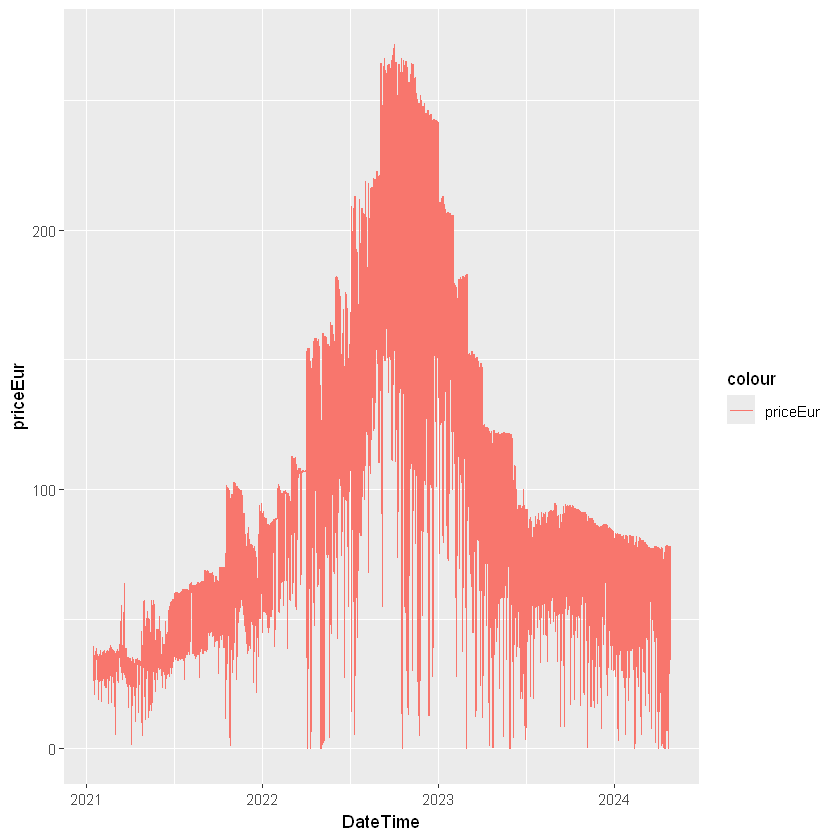

In [3]:
ggplot(data,aes(x=DateTime)) + geom_line(aes(y=priceEur,color='priceEur'))

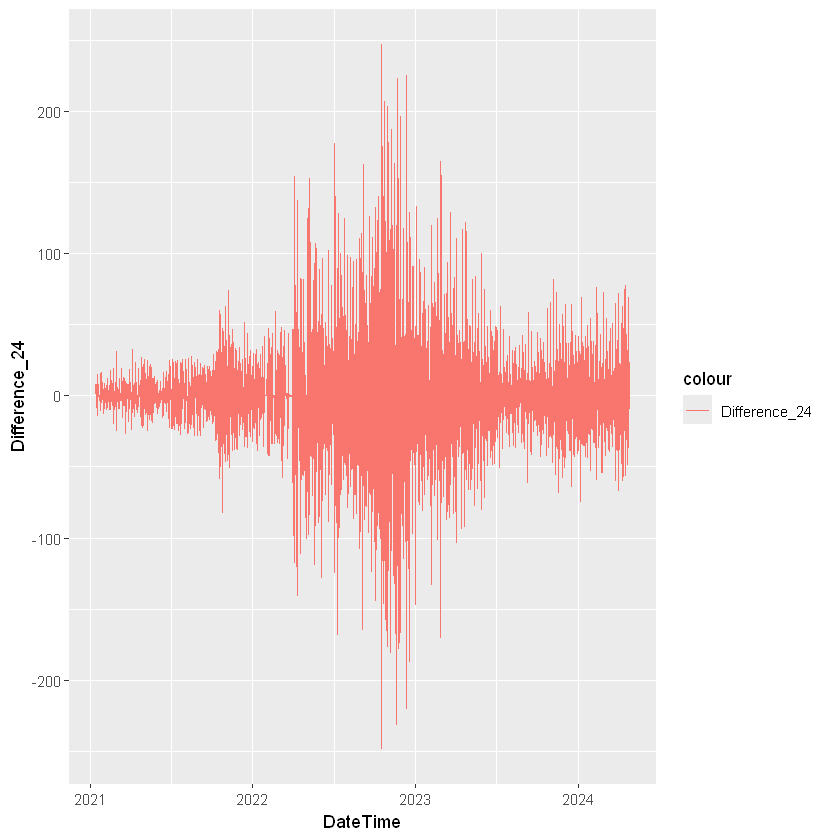

In [4]:
ggplot(data,aes(x=DateTime)) + geom_line(aes(y=Difference_24,color='Difference_24'))

In [5]:
#ggpairs(data)

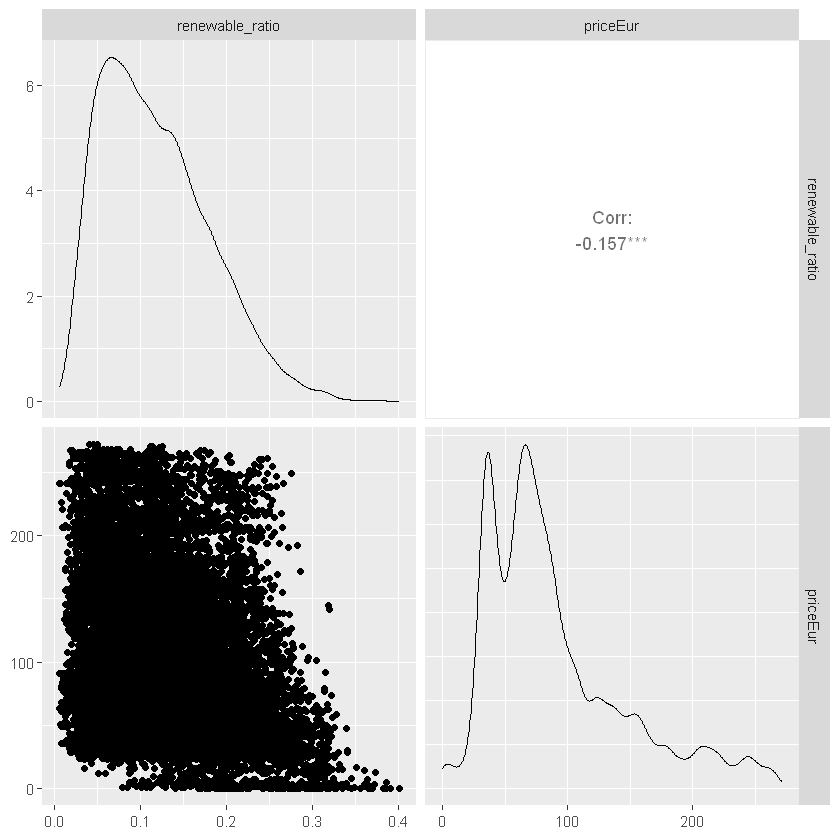

In [6]:
data <- as.data.frame(data)

selected_columns <- c("renewable_ratio", "priceEur")

ggpairs(data[, selected_columns])

In [7]:
#data <- as.data.frame(data)

#selected_columns <- c("DateTime", "Difference_24", "priceEur")

#ggpairs(data[, selected_columns])

In [8]:
#data <- as.data.frame(data)

#selected_columns <- c("DateTime", "Difference_168", "priceEur")

#ggpairs(data[, selected_columns])

In [9]:
# Filter data for "Workday" column equal to 1
#workday_data <- subset(data, not_holiday == 1)

# Calculate the average of "priceEur" column
#average_price <- mean(workday_data$priceEur)

# Print the average price
#print(average_price)

ERROR: Error in eval(e, x, parent.frame()): object 'not_holiday' not found


In [ ]:
# Filter data for "Workday" column equal to 1
#workday_data <- subset(data, not_holiday == 0)

# Calculate the average of "priceEur" column
#average_price <- mean(workday_data$priceEur)

# Print the average price
#print(average_price)

[1] 61.0155


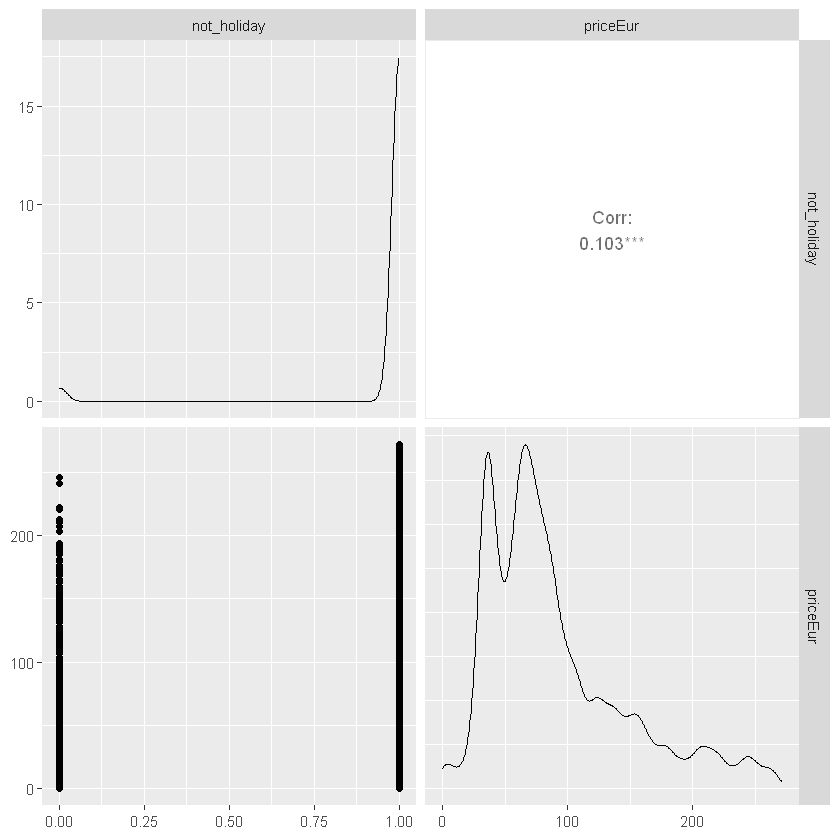

In [10]:
data <- as.data.frame(data)
#colnames(data)[colnames(data) == "Workday"] <- "not_holiday"
#selected_columns <- c("not_holiday", "priceEur")

#ggpairs(data[, selected_columns])

In [ ]:
#data <- as.data.frame(data)

#selected_columns <- c("DateTime", "forecast", "priceEur")

#ggpairs(data[, selected_columns])

In [ ]:
#data <- as.data.frame(data)

#selected_columns <- c("DateTime", "BV Forecast", "priceEur")

#ggpairs(data[, selected_columns])

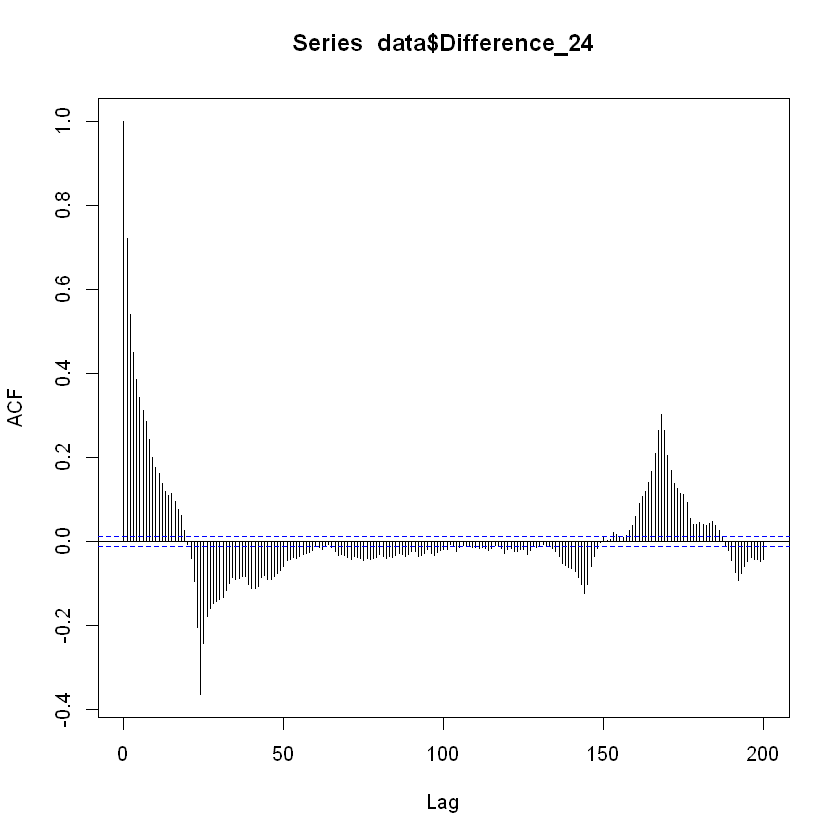

In [ ]:
acf(data$Difference_24, lag.max = 200)

# 1 Autoarima for Difference_24, with Workday and Workday_24 regressors

In [12]:
predictors <- c("Workday", "Workday_24")

# Convert predictors to a numeric matrix
predictor_matrix <- as.matrix(data[, ..predictors])

auto_arima_model1 <- auto.arima(data$Difference_24, xreg = predictor_matrix)

ERROR: Error in eval(expr, envir, enclos): object '..predictors' not found


In [ ]:
summary(auto_arima_model1)

Series: data$Difference_24 
Regression with ARIMA(2,0,2) errors 

Coefficients:
         ar1      ar2      ma1      ma2  Workday  Workday_24
      1.1781  -0.2603  -0.5036  -0.1027   8.3123     -8.2709
s.e.  0.0369   0.0303   0.0370   0.0109   1.4411      1.4412

sigma^2 = 352.2:  log likelihood = -125100.5
AIC=250214.9   AICc=250214.9   BIC=250272.8

Training set error measures:
                      ME     RMSE      MAE MPE MAPE      MASE         ACF1
Training set -0.00200711 18.76636 10.51922 NaN  Inf 0.9494724 3.455141e-05


	Ljung-Box test

data:  Residuals from Regression with ARIMA(2,0,2) errors
Q* = 60.917, df = 6, p-value = 2.93e-11

Model df: 4.   Total lags used: 10



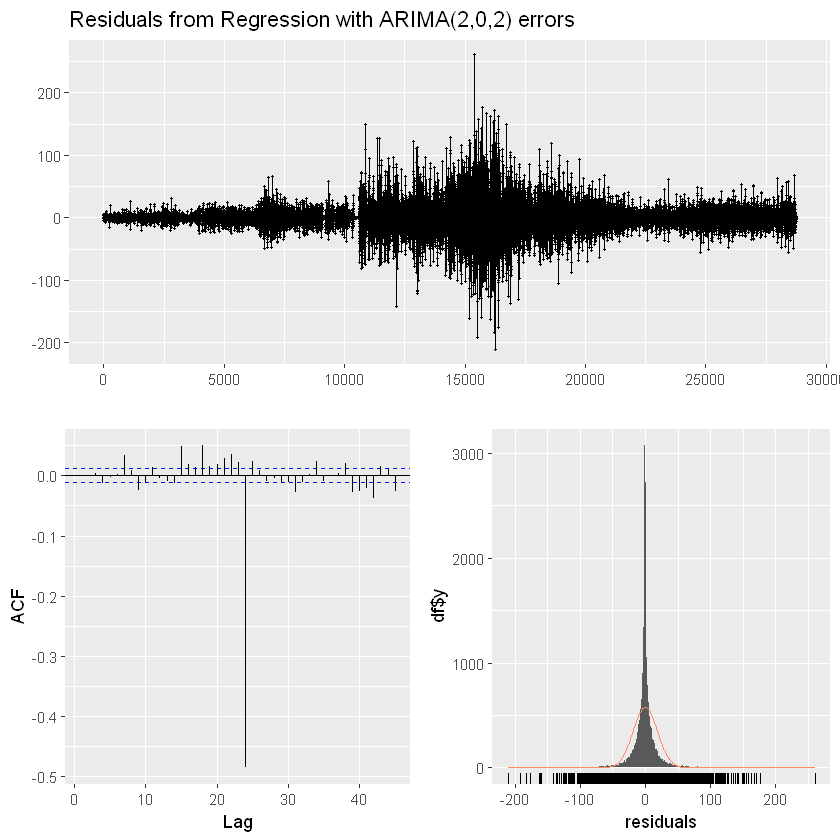

In [ ]:
checkresiduals(auto_arima_model1)

ERROR: Error in eval(expr, envir, enclos): object 'actual_values' not found


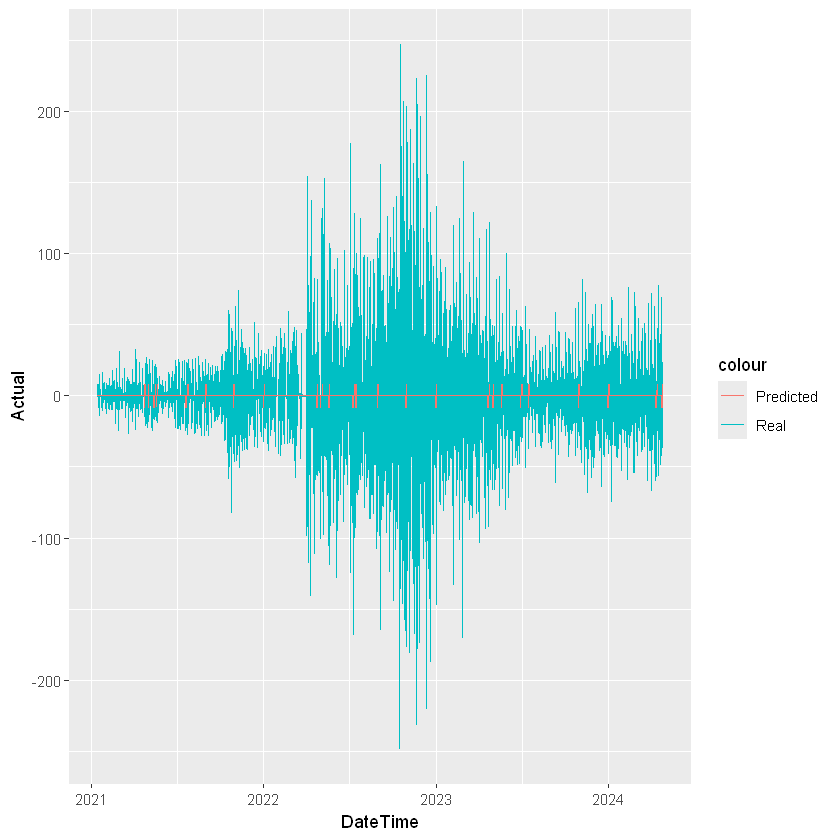

In [ ]:
forecast_values <- forecast(auto_arima_model1, xreg = predictor_matrix)

plot_data <- data.frame(
  DateTime = data$DateTime,
  Actual = data$Difference_24,
  Predicted = forecast_values$mean
)

ggplot(plot_data, aes(x = DateTime)) +
  geom_line(aes(y = Actual, color = "Real")) +
  geom_line(aes(y = Predicted, color = "Predicted"))

# Calculate MSE
mse <- mean((forecast_values$mean - actual_values)^2)

# Print MSE
print(paste("Mean Squared Error (MSE):", mse))

In [ ]:
model_1_evaluation <- copy(data)

model_1_evaluation[,actual:=priceEur]
model_1_evaluation[,priceEur_24:=priceEur-Difference_24]
model_1_evaluation[,forecasted_diff:=forecast_values$mean]
model_1_evaluation[,forecasted_price:=priceEur_24 + forecast_values$mean]

residuals <- model_1_evaluation$actual - model_1_evaluation$forecasted_price
mse <- mean(residuals^2)
mae <- mean(abs(residuals))
mape <- mean(abs(residuals)/((model_1_evaluation$actual)+0.000001))
wmape <- sum(abs(residuals))/sum(model_1_evaluation$actual)

perf_results <- data.frame(
    Number = 1
    Model = "ARIMA (2,0,2)",
    Response = "Daily Difference (€)",
    I.Variables = "Holiday, Holiday(-24)"
    MSE = mse,
    MAE = mae,
    MAPE = mape,
    WMAPE = wmape,)

perf_results

Model,MSE,MAE,MAPE,WMAPE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ARIMA 1,738.9659,15.14293,37474.51,0.1681185


# 2. Autoarima for Difference_24, with Workday, Workday_24, and Hour regressors

In [ ]:
data <- data %>%
  mutate(
    Date = as.Date(DateTime),  # Extract date
    Hour = hour(DateTime)      # Extract hour
  )

data_one_hot <- model.matrix(~ factor(Hour) - 1, data = data)  # The '-1' removes the intercept

# Combine the one-hot encoded hours back with the original data frame
data <- cbind(data, data_one_hot)
data

DateTime,renewable_ratio,priceEur,Difference_24,Difference_168,Workday,Workday_168,Workday_24,forecast,BV Forecast,⋯,factor(Hour)14,factor(Hour)15,factor(Hour)16,factor(Hour)17,factor(Hour)18,factor(Hour)19,factor(Hour)20,factor(Hour)21,factor(Hour)22,factor(Hour)23
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2021-01-14 00:00:00,0.04073709,35.26,1.16,2.17,1,1,1,27.4,4187.97,⋯,0,0,0,0,0,0,0,0,0,0
2021-01-14 01:00:00,0.04586432,35.13,4.79,0.94,1,1,1,30.1,3975.82,⋯,0,0,0,0,0,0,0,0,0,0
2021-01-14 02:00:00,0.05103432,34.87,2.32,5.17,1,1,1,37.3,3885.02,⋯,0,0,0,0,0,0,0,0,0,0
2021-01-14 03:00:00,0.05995258,34.58,7.66,5.35,1,1,1,41.0,3589.79,⋯,0,0,0,0,0,0,0,0,0,0
2021-01-14 04:00:00,0.06207705,34.57,6.45,7.32,1,1,1,52.6,3137.07,⋯,0,0,0,0,0,0,0,0,0,0
2021-01-14 05:00:00,0.07138521,34.53,0.32,7.28,1,1,1,67.9,2717.61,⋯,0,0,0,0,0,0,0,0,0,0
2021-01-14 06:00:00,0.07629706,34.69,0.24,6.42,1,1,1,83.2,2882.89,⋯,0,0,0,0,0,0,0,0,0,0
2021-01-14 07:00:00,0.08121125,34.95,0.14,5.25,1,1,1,107.8,2746.63,⋯,0,0,0,0,0,0,0,0,0,0
2021-01-14 08:00:00,0.07804943,35.84,0.03,0.99,1,1,1,141.8,2642.18,⋯,0,0,0,0,0,0,0,0,0,0


In [ ]:
predictors <- c("Workday", "Workday_24", "factor(Hour)0", "factor(Hour)1", "factor(Hour)2", "factor(Hour)3", "factor(Hour)4", "factor(Hour)5", "factor(Hour)6", "factor(Hour)7", "factor(Hour)8", "factor(Hour)9", "factor(Hour)10", "factor(Hour)11", "factor(Hour)12", "factor(Hour)13", "factor(Hour)14", "factor(Hour)15", "factor(Hour)16", "factor(Hour)17", "factor(Hour)18", "factor(Hour)19", "factor(Hour)20", "factor(Hour)21", "factor(Hour)22", "factor(Hour)23")

# Convert predictors to a numeric matrix
predictor_matrix <- as.matrix(data[, ..predictors])

auto_arima_model2 <- auto.arima(data$Difference_24, xreg = predictor_matrix)

In [ ]:
summary(auto_arima_model2)

Series: data$Difference_24 
Regression with ARIMA(0,0,0) errors 

Coefficients:
      Workday  Workday_24  factor(Hour)0  factor(Hour)1  factor(Hour)2
      12.2623    -12.0599        -0.1582        -0.1551        -0.1606
s.e.   0.9300      0.9300         1.2415         1.2415         1.2415
      factor(Hour)3  factor(Hour)4  factor(Hour)5  factor(Hour)6  factor(Hour)7
            -0.1624        -0.1643        -0.1693        -0.1779        -0.1712
s.e.         1.2415         1.2415         1.2415         1.2415         1.2415
      factor(Hour)8  factor(Hour)9  factor(Hour)10  factor(Hour)11
            -0.1597        -0.1603         -0.1615         -0.1640
s.e.         1.2415         1.2415          1.2415          1.2415
      factor(Hour)12  factor(Hour)13  factor(Hour)14  factor(Hour)15
             -0.1858         -0.1795         -0.1679         -0.1669
s.e.          1.2415          1.2415          1.2415          1.2415
      factor(Hour)16  factor(Hour)17  factor(Hour)18  facto


	Ljung-Box test

data:  Residuals from Regression with ARIMA(0,0,0) errors
Q* = 44553, df = 10, p-value < 2.2e-16

Model df: 0.   Total lags used: 10



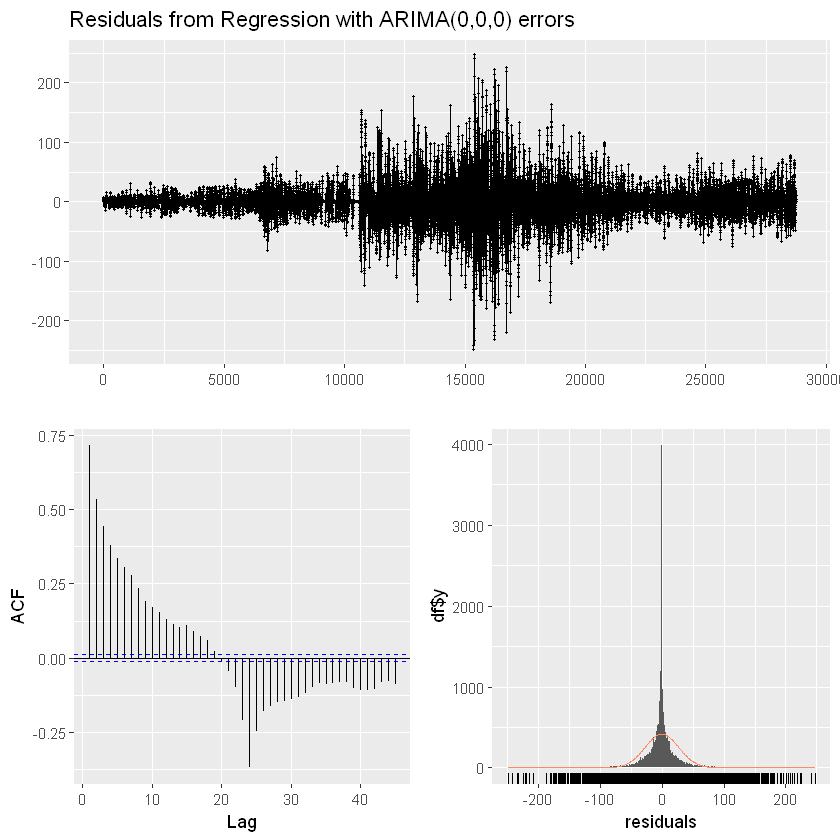

In [ ]:
checkresiduals(auto_arima_model2)

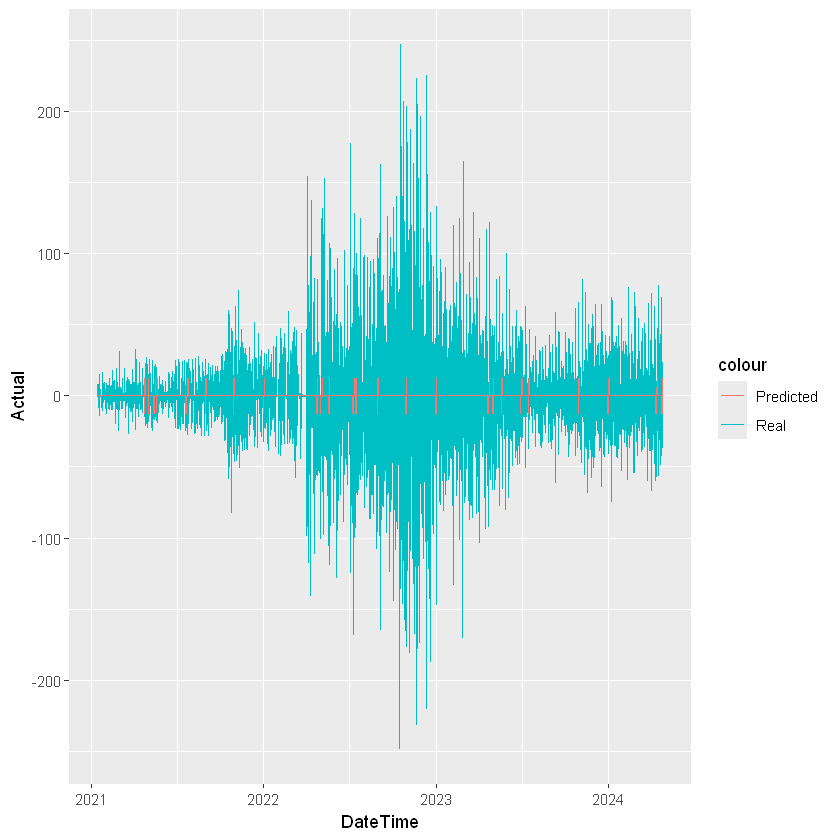

In [ ]:
forecast_values <- forecast(auto_arima_model2, xreg = predictor_matrix)


plot_data <- data.frame(
  DateTime = data$DateTime,
  Actual = data$Difference_24,
  Predicted = forecast_values$mean
)

ggplot(plot_data, aes(x = DateTime)) +
  geom_line(aes(y = Actual, color = "Real")) +
  geom_line(aes(y = Predicted, color = "Predicted"))


In [ ]:
model_2_evaluation <- copy(data)

model_2_evaluation[,actual:=priceEur]
model_2_evaluation[,priceEur_24:=priceEur-Difference_24]
model_2_evaluation[,forecasted_diff:=forecast_values$mean]
model_2_evaluation[,forecasted_price:=priceEur_24 + forecasted_diff]

residuals <- model_2_evaluation$actual - model_2_evaluation$forecasted_price
mse <- mean(residuals^2)
mae <- mean(abs(residuals))
mape <- mean(abs(residuals)/((model_2_evaluation$actual)+0.000001))
wmape <- sum(abs(residuals))/sum(model_2_evaluation$actual)

new_row <- data.frame(
  Model = "ARIMA 2",
  MSE = mse,
  MAE = mae,
  MAPE = mape,
  WMAPE = wmape
)

perf_results <- rbind(perf_results, new_row)

perf_results

Model,MSE,MAE,MAPE,WMAPE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ARIMA 1,738.9659,15.14293,37474.51,0.1681185
ARIMA 2,738.3403,15.18102,37461.09,0.1685414


# 3 Autoarima for Difference_24, with Workday, Workday_24, and iswar regressors

In [ ]:
data_path='data.csv'
data=fread(data_path)

In [ ]:
data <- data %>%
  mutate(is_war = ifelse(DateTime >= as.Date("2022-02-01") & DateTime <= as.Date("2023-08-31"), 1, 0))

head(data)

DateTime,renewable_ratio,priceEur,Difference_24,Difference_168,Workday,Workday_168,Workday_24,forecast,BV Forecast,is_war
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2021-01-14 00:00:00,0.04073709,35.26,1.16,2.17,1,1,1,27.4,4187.97,0
2021-01-14 01:00:00,0.04586432,35.13,4.79,0.94,1,1,1,30.1,3975.82,0
2021-01-14 02:00:00,0.05103432,34.87,2.32,5.17,1,1,1,37.3,3885.02,0
2021-01-14 03:00:00,0.05995258,34.58,7.66,5.35,1,1,1,41.0,3589.79,0
2021-01-14 04:00:00,0.06207705,34.57,6.45,7.32,1,1,1,52.6,3137.07,0
2021-01-14 05:00:00,0.07138521,34.53,0.32,7.28,1,1,1,67.9,2717.61,0


In [ ]:
predictors <- c("Workday", "Workday_24", "is_war")

predictor_matrix <- as.matrix(data[, ..predictors])

auto_arima_model3 <- auto.arima(data$Difference_24, xreg = predictor_matrix)

In [ ]:
summary(auto_arima_model3)

Series: data$Difference_24 
Regression with ARIMA(2,0,2) errors 

Coefficients:
         ar1      ar2      ma1      ma2  Workday  Workday_24   is_war
      1.1804  -0.2620  -0.5058  -0.1023   7.3634     -7.2675  -0.1104
s.e.  0.0368   0.0302   0.0368   0.0109   1.4630      1.4631   1.0380

sigma^2 = 352.3:  log likelihood = -125100.2
AIC=250216.4   AICc=250216.5   BIC=250282.6

Training set error measures:
                       ME    RMSE      MAE MPE MAPE      MASE          ACF1
Training set -0.001865806 18.7662 10.51688 NaN  Inf 0.9492611 -5.253791e-06


	Ljung-Box test

data:  Residuals from Regression with ARIMA(2,0,2) errors
Q* = 61.02, df = 6, p-value = 2.792e-11

Model df: 4.   Total lags used: 10



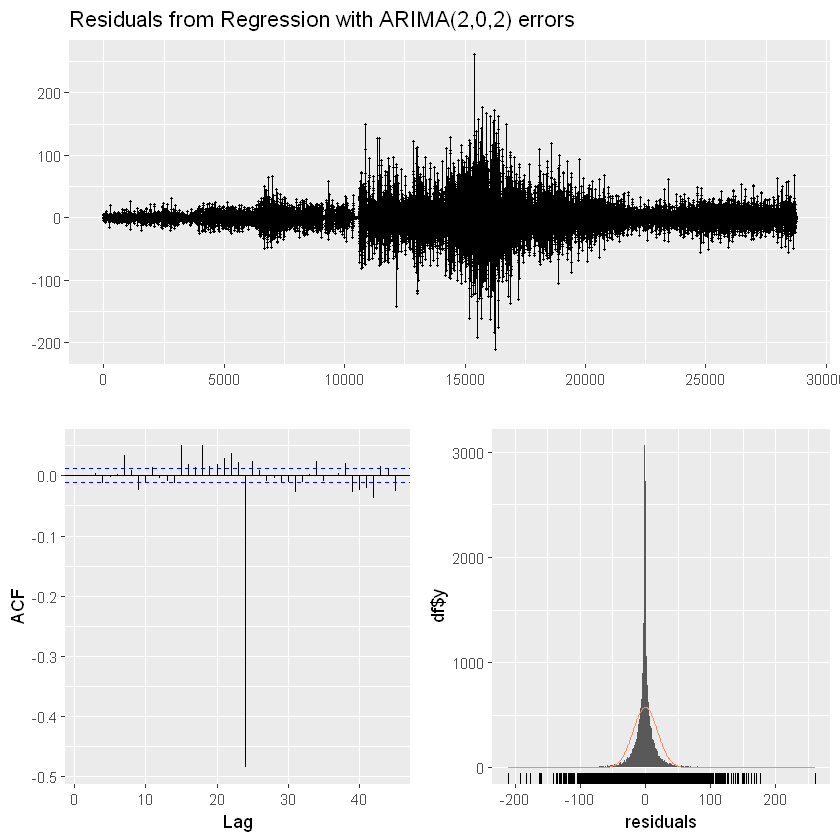

In [ ]:
checkresiduals(auto_arima_model3)

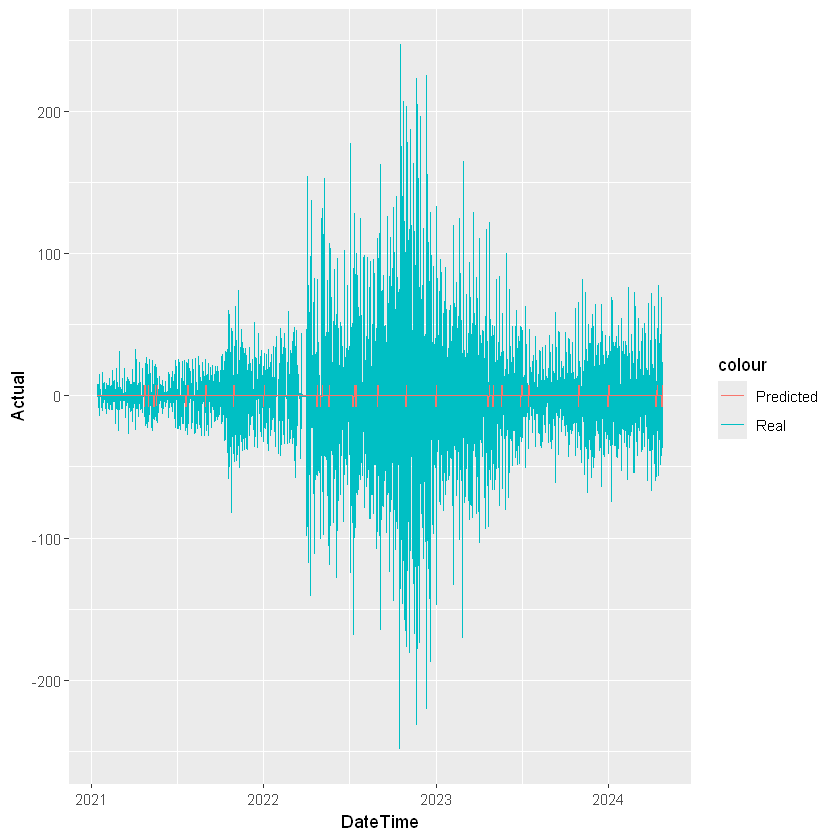

In [ ]:
forecast_values <- forecast(auto_arima_model3, xreg = predictor_matrix)

plot_data <- data.frame(
  DateTime = data$DateTime,
  Actual = data$Difference_24,
  Predicted = forecast_values$mean
)

ggplot(plot_data, aes(x = DateTime)) +
  geom_line(aes(y = Actual, color = "Real")) +
  geom_line(aes(y = Predicted, color = "Predicted"))


In [ ]:
model_3_evaluation <- copy(data)

model_3_evaluation[,actual:=priceEur]
model_3_evaluation[,priceEur_24:=priceEur-Difference_24]
model_3_evaluation[,forecasted_diff:=forecast_values$mean]
model_3_evaluation[,forecasted_price:=priceEur_24 + forecasted_diff]

residuals <- model_3_evaluation$actual - model_3_evaluation$forecasted_price
mse <- mean(residuals^2)
mae <- mean(abs(residuals))
mape <- mean(abs(residuals)/((model_3_evaluation$actual)+0.000001))
wmape <- sum(abs(residuals))/sum(model_3_evaluation$actual)

new_row <- data.frame(
  Model = "ARIMA 3",
  MSE = mse,
  MAE = mae,
  MAPE = mape,
  WMAPE = wmape
)

# Add the new row to the data frame
perf_results <- rbind(perf_results, new_row)

perf_results

Model,MSE,MAE,MAPE,WMAPE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ARIMA 1,738.9659,15.14293,37474.51,0.1681185
ARIMA 2,738.3403,15.18102,37461.09,0.1685414
ARIMA 3,739.3178,15.13699,37449.06,0.1680526


# 4 Linear Regression for Difference_24, with its lag_24 and lag_168 values

In [ ]:
data_path='data.csv'
data=fread(data_path)

data[, diff_24_lag_24 := shift(Difference_24, 24)]
data[, diff_24_lag_168 := shift(Difference_24, 168)]
head(data)

DateTime,renewable_ratio,priceEur,Difference_24,Difference_168,Workday,Workday_168,Workday_24,forecast,BV Forecast,diff_24_lag_24,diff_24_lag_168
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2021-01-14 00:00:00,0.04073709,35.26,1.16,2.17,1,1,1,27.4,4187.97,NA,NA
2021-01-14 01:00:00,0.04586432,35.13,4.79,0.94,1,1,1,30.1,3975.82,NA,NA
2021-01-14 02:00:00,0.05103432,34.87,2.32,5.17,1,1,1,37.3,3885.02,NA,NA
2021-01-14 03:00:00,0.05995258,34.58,7.66,5.35,1,1,1,41.0,3589.79,NA,NA
2021-01-14 04:00:00,0.06207705,34.57,6.45,7.32,1,1,1,52.6,3137.07,NA,NA
2021-01-14 05:00:00,0.07138521,34.53,0.32,7.28,1,1,1,67.9,2717.61,NA,NA


Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 24 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 168 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 24 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 168 rows containing missing values"
Warning message:
"Removed 24 rows containing missing values or values outside the scale range
(`geom_point()`)."
Warning message:
"Removed 24 rows containing missing values or values outside the scale range
(`geom_point()`)."
Warning message:
"Removed 24 rows containing non-finite outside the scale range
(`stat_density()`)."
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 168 rows containing missing values"
Warning message:
"Removed

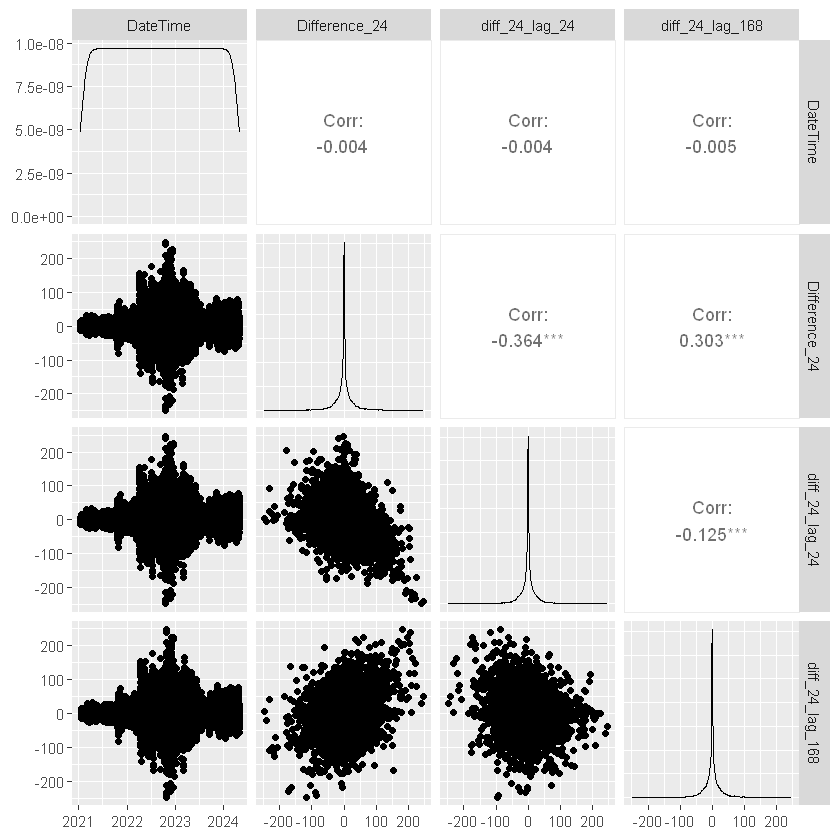

In [ ]:
ggpairs(data[, c("DateTime", "Difference_24", "diff_24_lag_24", "diff_24_lag_168")])

In [ ]:
lm_model <- lm(Difference_24 ~ diff_24_lag_24 + diff_24_lag_168 + Workday + Workday_24, data = data)

# Summary of the regression model
summary(lm_model)



Call:
lm(formula = Difference_24 ~ diff_24_lag_24 + diff_24_lag_168 + 
    Workday + Workday_24, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-248.780   -7.108    0.055    7.932  190.383 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -3.073414   0.874867  -3.513 0.000444 ***
diff_24_lag_24   -0.331926   0.005312 -62.483  < 2e-16 ***
diff_24_lag_168   0.263108   0.005316  49.489  < 2e-16 ***
Workday          14.014573   0.833515  16.814  < 2e-16 ***
Workday_24      -10.785218   0.833809 -12.935  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 24.34 on 28579 degrees of freedom
  (168 observations deleted due to missingness)
Multiple R-squared:  0.2088,	Adjusted R-squared:  0.2087 
F-statistic:  1885 on 4 and 28579 DF,  p-value: < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 10

data:  Residuals
LM test = 15419, df = 10, p-value < 2.2e-16


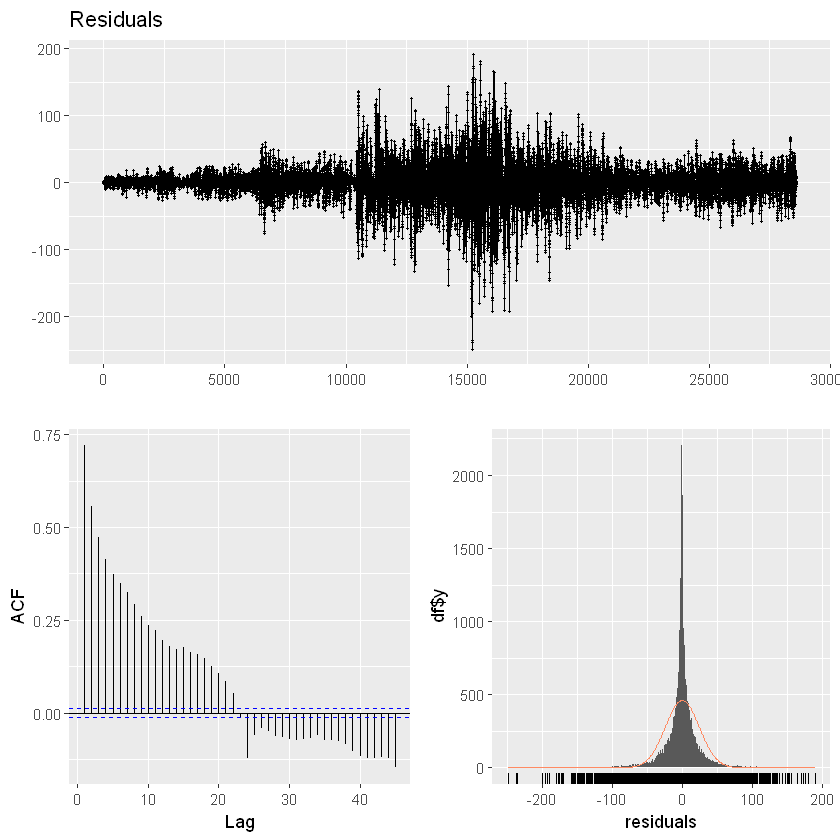

In [ ]:
checkresiduals(lm_model)

In [ ]:
predictions <- predict(lm_model, newdata = na.omit(data))

model_4_evaluation <- copy(na.omit(data))

model_4_evaluation[,actual:=priceEur]
model_4_evaluation[,priceEur_24:=priceEur-Difference_24]
model_4_evaluation[,forecasted_diff:=predictions]
model_4_evaluation[,forecasted_price:=priceEur_24 + predictions]

residuals <- model_4_evaluation$actual - model_4_evaluation$forecasted_price

mse <- mean(residuals^2)
mae <- mean(abs(residuals))
mape <- mean(abs(residuals)/((model_4_evaluation$actual)+0.000001))
wmape <- sum(abs(residuals))/sum(model_4_evaluation$actual)

new_row <- data.frame(
  Model = "LRM 4",
  MSE = mse,
  MAE = mae,
  MAPE = mape,
  WMAPE = wmape
)

perf_results <- rbind(perf_results, new_row)

perf_results

Model,MSE,MAE,MAPE,WMAPE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ARIMA 1,738.9659,15.14293,37474.51,0.1681185
ARIMA 2,738.3403,15.18102,37461.09,0.1685414
ARIMA 3,739.3178,15.13699,37449.06,0.1680526
LRM 4,592.4825,14.47721,39253.08,0.1601491


# 5 Linear Regression with Hour of Day

In [ ]:
data_path='data.csv'
data=fread(data_path)

data[, diff_24_lag_24 := shift(Difference_24, 24)]
data[, diff_24_lag_168 := shift(Difference_24, 168)]

data <- data %>%
  mutate(
    Date = as.Date(DateTime),  # Extract date
    Hour = hour(DateTime)      # Extract hour
  )

data_one_hot <- model.matrix(~ factor(Hour) - 1, data = data)  # The '-1' removes the intercept


data <- cbind(data, data_one_hot)

tail(data)

DateTime,renewable_ratio,priceEur,Difference_24,Difference_168,Workday,Workday_168,Workday_24,forecast,BV Forecast,⋯,factor(Hour)14,factor(Hour)15,factor(Hour)16,factor(Hour)17,factor(Hour)18,factor(Hour)19,factor(Hour)20,factor(Hour)21,factor(Hour)22,factor(Hour)23
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2024-04-25 18:00:00,0.11151240,77.99,0,0.67,1,1,1,318.28,5439.89,⋯,0,0,0,0,1,0,0,0,0,0
2024-04-25 19:00:00,0.10691880,77.99,0,-0.44,1,1,1,264.01,4703.63,⋯,0,0,0,0,0,1,0,0,0,0
2024-04-25 20:00:00,0.10165056,77.99,0,-0.44,1,1,1,219.62,4501.67,⋯,0,0,0,0,0,0,1,0,0,0
2024-04-25 21:00:00,0.10212468,77.99,0,-0.44,1,1,1,191.99,4394.75,⋯,0,0,0,0,0,0,0,1,0,0
2024-04-25 22:00:00,0.09613362,77.99,0,1.04,1,1,1,157.67,4235.98,⋯,0,0,0,0,0,0,0,0,1,0
2024-04-25 23:00:00,0.09804755,77.99,0,10.57,1,1,1,134.85,4053.30,⋯,0,0,0,0,0,0,0,0,0,1


In [ ]:
data <- data %>%
  mutate(across(starts_with("factor(Hour)"), as.factor))


lm_model <- lm(Difference_24 ~ diff_24_lag_24 + diff_24_lag_168 + Workday + Workday_24 + 
                 as.factor(factor(Hour)) -1 ,  # Minus 1 to remove intercept
               data = data)

summary(lm_model)



Call:
lm(formula = Difference_24 ~ diff_24_lag_24 + diff_24_lag_168 + 
    Workday + Workday_24 + as.factor(factor(Hour)) - 1, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-248.787   -7.110    0.054    7.925  190.388 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
diff_24_lag_24             -0.331927   0.005314 -62.458  < 2e-16 ***
diff_24_lag_168             0.263108   0.005319  49.470  < 2e-16 ***
Workday                    14.014573   0.833851  16.807  < 2e-16 ***
Workday_24                -10.785217   0.834145 -12.930  < 2e-16 ***
as.factor(factor(Hour))0   -3.066918   1.114992  -2.751  0.00595 ** 
as.factor(factor(Hour))1   -3.067742   1.114995  -2.751  0.00594 ** 
as.factor(factor(Hour))2   -3.072944   1.114998  -2.756  0.00585 ** 
as.factor(factor(Hour))3   -3.078226   1.114999  -2.761  0.00577 ** 
as.factor(factor(Hour))4   -3.074759   1.114996  -2.758  0.00583 ** 
as.factor(factor(Hour))5   -3.078561   1.114997  -

In [ ]:
predictions <- predict(lm_model, newdata = na.omit(data))

model_5_evaluation <- copy(na.omit(data))

model_5_evaluation[,actual:=priceEur]
model_5_evaluation[,priceEur_24:=priceEur-Difference_24]
model_5_evaluation[,forecasted_diff:=predictions]
model_5_evaluation[,forecasted_price:=priceEur_24 + predictions]

residuals <- model_5_evaluation$actual - model_5_evaluation$forecasted_price

mse <- mean(residuals^2)
mae <- mean(abs(residuals))
mape <- mean(abs(residuals)/((model_5_evaluation$actual)+0.000001))
wmape <- sum(abs(residuals))/sum(model_5_evaluation$actual)

new_row <- data.frame(
  Model = "LRM 5",
  MSE = mse,
  MAE = mae,
  MAPE = mape,
  WMAPE = wmape
)

perf_results <- rbind(perf_results, new_row)

perf_results

Model,MSE,MAE,MAPE,WMAPE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ARIMA 1,738.9659,15.14293,37474.51,0.1681185
ARIMA 2,738.3403,15.18102,37461.09,0.1685414
ARIMA 3,739.3178,15.13699,37449.06,0.1680526
LRM 4,592.4825,14.47721,39253.08,0.1601491
LRM 5,592.4824,14.47723,39250.55,0.1601492


# 6 Same PTF as yesterday

In [ ]:
data_path='data.csv'
data=fread(data_path)

model_6_evaluation <- copy(data)
model_6_evaluation[,actual:=priceEur]
model_6_evaluation[,forecasted_price:=priceEur - Difference_24]

residuals <- model_6_evaluation$actual - model_6_evaluation$forecasted_price

mse <- mean(residuals^2)
mae <- mean(abs(residuals))
mape <- mean(abs(residuals)/((model_6_evaluation$actual)+0.000001))
wmape <- sum(abs(residuals))/sum(model_6_evaluation$actual)

new_row <- data.frame(
  Model = "Same as Yesterday 6",
  MSE = mse,
  MAE = mae,
  MAPE = mape,
  WMAPE = wmape
)

perf_results <- rbind(perf_results, new_row)

perf_results

Model,MSE,MAE,MAPE,WMAPE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ARIMA 1,738.9659,15.14293,37474.51,0.1681185
ARIMA 2,738.3403,15.18102,37461.09,0.1685414
ARIMA 3,739.3178,15.13699,37449.06,0.1680526
LRM 4,592.4825,14.47721,39253.08,0.1601491
LRM 5,592.4824,14.47723,39250.55,0.1601492
Same as Yesterday 6,744.5148,15.12668,37447.11,0.1679381


# 7 Same PTF as Last Week

In [ ]:
data_path='data.csv'
data=fread(data_path)

model_7_evaluation <- copy(data)
model_7_evaluation[,actual:=priceEur]
model_7_evaluation[,forecasted_price:=priceEur - Difference_168]

residuals <- model_7_evaluation$actual - model_7_evaluation$forecasted_price

mse <- mean(residuals^2)
mae <- mean(abs(residuals))
mape <- mean(abs(residuals)/((model_7_evaluation$actual)+0.000001))
wmape <- sum(abs(residuals))/sum(model_7_evaluation$actual)

new_row <- data.frame(
  Model = "Same as Last Week 7",
  MSE = mse,
  MAE = mae,
  MAPE = mape,
  WMAPE = wmape
)

perf_results <- rbind(perf_results, new_row)

perf_results

Model,MSE,MAE,MAPE,WMAPE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ARIMA 1,738.9659,15.14293,37474.51,0.1681185
ARIMA 2,738.3403,15.18102,37461.09,0.1685414
ARIMA 3,739.3178,15.13699,37449.06,0.1680526
LRM 4,592.4825,14.47721,39253.08,0.1601491
LRM 5,592.4824,14.47723,39250.55,0.1601492
Same as Yesterday 6,744.5148,15.12668,37447.11,0.1679381
Same as Last Week 7,815.4347,16.66282,39897.34,0.1849925


# 8 Linear Regression for Price with Lag_24, Lag_168, and Workdays

In [ ]:
data_path='data.csv'
data=fread(data_path)

data[,price_lag_24:=priceEur - Difference_24]
data[,price_lag_168:=priceEur - Difference_168]
head(data)

DateTime,renewable_ratio,priceEur,Difference_24,Difference_168,Workday,Workday_168,Workday_24,forecast,BV Forecast,price_lag_24,price_lag_168
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2021-01-14 00:00:00,0.04073709,35.26,1.16,2.17,1,1,1,27.4,4187.97,34.10,33.09
2021-01-14 01:00:00,0.04586432,35.13,4.79,0.94,1,1,1,30.1,3975.82,30.34,34.19
2021-01-14 02:00:00,0.05103432,34.87,2.32,5.17,1,1,1,37.3,3885.02,32.55,29.70
2021-01-14 03:00:00,0.05995258,34.58,7.66,5.35,1,1,1,41.0,3589.79,26.92,29.23
2021-01-14 04:00:00,0.06207705,34.57,6.45,7.32,1,1,1,52.6,3137.07,28.12,27.25
2021-01-14 05:00:00,0.07138521,34.53,0.32,7.28,1,1,1,67.9,2717.61,34.21,27.25


In [ ]:
lm_model <- lm(priceEur ~  price_lag_24 + price_lag_168 + Workday + Workday_24 + Workday_168, data = data)


summary(lm_model)


Call:
lm(formula = priceEur ~ price_lag_24 + price_lag_168 + Workday + 
    Workday_24 + Workday_168, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-227.331   -7.196   -0.713    7.793  150.824 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.88662    1.06588   0.832   0.4055    
price_lag_24    0.49286    0.00437 112.794   <2e-16 ***
price_lag_168   0.46023    0.00436 105.567   <2e-16 ***
Workday        16.50655    0.76736  21.511   <2e-16 ***
Workday_24     -1.73332    0.77116  -2.248   0.0246 *  
Workday_168   -11.20198    0.71046 -15.767   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 22.37 on 28746 degrees of freedom
Multiple R-squared:  0.8402,	Adjusted R-squared:  0.8402 
F-statistic: 3.024e+04 on 5 and 28746 DF,  p-value: < 2.2e-16


In [ ]:
predictions <- predict(lm_model, newdata = na.omit(data))

model_8_evaluation <- copy(na.omit(data))

model_8_evaluation[,actual:=priceEur]
model_8_evaluation[,forecasted_price:=predictions]

residuals <- model_8_evaluation$actual - model_8_evaluation$forecasted_price

mse <- mean(residuals^2)
mae <- mean(abs(residuals))
mape <- mean(abs(residuals)/((model_8_evaluation$actual)+0.000001))
wmape <- sum(abs(residuals))/sum(model_8_evaluation$actual)

new_row <- data.frame(
  Model = "LRM 8",
  MSE = mse,
  MAE = mae,
  MAPE = mape,
  WMAPE = wmape
)

perf_results <- rbind(perf_results, new_row)

perf_results

Model,MSE,MAE,MAPE,WMAPE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ARIMA 1,738.9659,15.14293,37474.51,0.1681185
ARIMA 2,738.3403,15.18102,37461.09,0.1685414
ARIMA 3,739.3178,15.13699,37449.06,0.1680526
LRM 4,592.4825,14.47721,39253.08,0.1601491
LRM 5,592.4824,14.47723,39250.55,0.1601492
Same as Yesterday 6,744.5148,15.12668,37447.11,0.1679381
Same as Last Week 7,815.4347,16.66282,39897.34,0.1849925
LRM 8,500.1183,13.75569,39405.29,0.1527173


# 8TH MODEL FOR SOLVING OPTIMIZATION MODEL

In [ ]:
data_path='dataforptf.csv'
data=fread(data_path)
setnames(data, "Tatil", "Workday")
head(data)

date,hour,price,priceUsd,priceEur,Price_Lag_24,Price_Lag_168,Workday,forecast
<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
2021-01-07 00:00:00,00:00,300.00,40.61,33.09,300.00,285.00,1,115.6
2021-01-07 01:00:00,01:00,309.99,41.97,34.19,310.39,269.99,1,131.0
2021-01-07 02:00:00,02:00,269.24,36.45,29.70,269.98,259.00,1,143.3
2021-01-07 03:00:00,03:00,264.99,35.87,29.23,256.32,236.99,1,153.6
2021-01-07 04:00:00,04:00,247.03,33.44,27.25,247.02,236.98,1,162.9
2021-01-07 05:00:00,05:00,247.03,33.44,27.25,256.33,236.99,1,168.6


In [ ]:
data[, c("Price_Lag_24", "Price_Lag_168") := NULL]
data[, c("priceEur_24", "priceEur_168", "Workday_24", "Workday_168") := .(
  shift(priceEur, n = 24, fill = NA), 
  shift(priceEur, n = 168, fill = NA),
  shift(Workday, n = 24, fill = NA),
  shift(Workday, n = 168, fill = NA))]
head(data)

date,hour,price,priceUsd,priceEur,Workday,forecast,priceEur_24,priceEur_168,Workday_24,Workday_168
<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>
2021-01-07 00:00:00,00:00,300.00,40.61,33.09,1,115.6,NA,NA,NA,NA
2021-01-07 01:00:00,01:00,309.99,41.97,34.19,1,131.0,NA,NA,NA,NA
2021-01-07 02:00:00,02:00,269.24,36.45,29.70,1,143.3,NA,NA,NA,NA
2021-01-07 03:00:00,03:00,264.99,35.87,29.23,1,153.6,NA,NA,NA,NA
2021-01-07 04:00:00,04:00,247.03,33.44,27.25,1,162.9,NA,NA,NA,NA
2021-01-07 05:00:00,05:00,247.03,33.44,27.25,1,168.6,NA,NA,NA,NA


In [ ]:
data <- na.omit(data)
head(data)
tail(data)

date,hour,price,priceUsd,priceEur,Workday,forecast,priceEur_24,priceEur_168,Workday_24,Workday_168
<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>
2021-01-14 00:00:00,00:00,319.81,42.87,35.26,1,27.4,34.10,33.09,1,1
2021-01-14 01:00:00,01:00,318.60,42.70,35.13,1,30.1,30.34,34.19,1,1
2021-01-14 02:00:00,02:00,316.21,42.38,34.87,1,37.3,32.55,29.70,1,1
2021-01-14 03:00:00,03:00,313.66,42.04,34.58,1,41.0,26.92,29.23,1,1
2021-01-14 04:00:00,04:00,313.50,42.02,34.57,1,52.6,28.12,27.25,1,1
2021-01-14 05:00:00,05:00,313.13,41.97,34.53,1,67.9,34.21,27.25,1,1


date,hour,price,priceUsd,priceEur,Workday,forecast,priceEur_24,priceEur_168,Workday_24,Workday_168
<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>
2024-04-25 18:00:00,18:00,2700,83.08,77.99,1,318.28,77.99,77.32,1,1
2024-04-25 19:00:00,19:00,2700,83.08,77.99,1,264.01,77.99,78.43,1,1
2024-04-25 20:00:00,20:00,2700,83.08,77.99,1,219.62,77.99,78.43,1,1
2024-04-25 21:00:00,21:00,2700,83.08,77.99,1,191.99,77.99,78.43,1,1
2024-04-25 22:00:00,22:00,2700,83.08,77.99,1,157.67,77.99,76.95,1,1
2024-04-25 23:00:00,23:00,2700,83.08,77.99,1,134.85,77.99,67.42,1,1


In [ ]:
data$date <- as.POSIXct(data$date)
head(data)
tail(data)

date,hour,price,priceUsd,priceEur,Workday,forecast,priceEur_24,priceEur_168,Workday_24,Workday_168
<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>
2021-01-14 00:00:00,00:00,319.81,42.87,35.26,1,27.4,34.10,33.09,1,1
2021-01-14 01:00:00,01:00,318.60,42.70,35.13,1,30.1,30.34,34.19,1,1
2021-01-14 02:00:00,02:00,316.21,42.38,34.87,1,37.3,32.55,29.70,1,1
2021-01-14 03:00:00,03:00,313.66,42.04,34.58,1,41.0,26.92,29.23,1,1
2021-01-14 04:00:00,04:00,313.50,42.02,34.57,1,52.6,28.12,27.25,1,1
2021-01-14 05:00:00,05:00,313.13,41.97,34.53,1,67.9,34.21,27.25,1,1


date,hour,price,priceUsd,priceEur,Workday,forecast,priceEur_24,priceEur_168,Workday_24,Workday_168
<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>
2024-04-25 18:00:00,18:00,2700,83.08,77.99,1,318.28,77.99,77.32,1,1
2024-04-25 19:00:00,19:00,2700,83.08,77.99,1,264.01,77.99,78.43,1,1
2024-04-25 20:00:00,20:00,2700,83.08,77.99,1,219.62,77.99,78.43,1,1
2024-04-25 21:00:00,21:00,2700,83.08,77.99,1,191.99,77.99,78.43,1,1
2024-04-25 22:00:00,22:00,2700,83.08,77.99,1,157.67,77.99,76.95,1,1
2024-04-25 23:00:00,23:00,2700,83.08,77.99,1,134.85,77.99,67.42,1,1


In [ ]:
train_data <- data[date < as.POSIXct("2023-04-25"), ]
test_data <- data[date >= as.POSIXct("2023-04-25"), ]

head(train_data)
tail(train_data)
head(test_data)
tail(test_data)

date,hour,price,priceUsd,priceEur,Workday,forecast,priceEur_24,priceEur_168,Workday_24,Workday_168
<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>
2021-01-14 00:00:00,00:00,319.81,42.87,35.26,1,27.4,34.10,33.09,1,1
2021-01-14 01:00:00,01:00,318.60,42.70,35.13,1,30.1,30.34,34.19,1,1
2021-01-14 02:00:00,02:00,316.21,42.38,34.87,1,37.3,32.55,29.70,1,1
2021-01-14 03:00:00,03:00,313.66,42.04,34.58,1,41.0,26.92,29.23,1,1
2021-01-14 04:00:00,04:00,313.50,42.02,34.57,1,52.6,28.12,27.25,1,1
2021-01-14 05:00:00,05:00,313.13,41.97,34.53,1,67.9,34.21,27.25,1,1


date,hour,price,priceUsd,priceEur,Workday,forecast,priceEur_24,priceEur_168,Workday_24,Workday_168
<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>
2023-04-24 15:00:00,15:00,2244.45,115.81,105.81,1,106.49,0.94,79.49,0,1
2023-04-24 16:00:00,16:00,2499.99,128.99,117.86,1,111.89,2.50,86.24,0,1
2023-04-24 17:00:00,17:00,2600.00,134.15,122.57,1,114.78,23.57,84.12,0,1
2023-04-24 18:00:00,18:00,2600.00,134.15,122.57,1,119.24,47.14,117.50,0,1
2023-04-24 19:00:00,19:00,2600.00,134.15,122.57,1,119.81,79.20,121.57,0,1
2023-04-24 20:00:00,20:00,2600.00,134.15,122.57,1,117.13,83.91,121.57,0,1


date,hour,price,priceUsd,priceEur,Workday,forecast,priceEur_24,priceEur_168,Workday_24,Workday_168
<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>
2023-04-24 21:00:00,21:00,2600.00,134.15,122.57,1,111.04,79.81,121.57,0,1
2023-04-24 22:00:00,22:00,2600.00,134.15,122.57,1,109.62,56.48,91.37,0,1
2023-04-24 23:00:00,23:00,2299.99,118.67,108.43,1,113.61,47.14,84.50,0,1
2023-04-25 00:00:00,00:00,2600.00,134.15,122.57,1,94.57,69.54,112.22,1,1
2023-04-25 01:00:00,01:00,2600.00,134.15,122.57,1,102.25,47.14,107.28,1,1
2023-04-25 02:00:00,02:00,2235.58,115.35,105.39,1,111.28,45.94,93.37,1,1


date,hour,price,priceUsd,priceEur,Workday,forecast,priceEur_24,priceEur_168,Workday_24,Workday_168
<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>
2024-04-25 18:00:00,18:00,2700,83.08,77.99,1,318.28,77.99,77.32,1,1
2024-04-25 19:00:00,19:00,2700,83.08,77.99,1,264.01,77.99,78.43,1,1
2024-04-25 20:00:00,20:00,2700,83.08,77.99,1,219.62,77.99,78.43,1,1
2024-04-25 21:00:00,21:00,2700,83.08,77.99,1,191.99,77.99,78.43,1,1
2024-04-25 22:00:00,22:00,2700,83.08,77.99,1,157.67,77.99,76.95,1,1
2024-04-25 23:00:00,23:00,2700,83.08,77.99,1,134.85,77.99,67.42,1,1


In [ ]:
lm_model <- lm(priceEur ~  priceEur_24 + priceEur_168 + Workday + Workday_24 + Workday_168, data = train_data)

summary(lm_model)


Call:
lm(formula = priceEur ~ priceEur_24 + priceEur_168 + Workday + 
    Workday_24 + Workday_168, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-228.157   -7.472   -1.429    8.344  150.202 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.246031   1.448218  -0.170 0.865102    
priceEur_24    0.500063   0.005265  94.972  < 2e-16 ***
priceEur_168   0.453098   0.005247  86.349  < 2e-16 ***
Workday       21.068106   1.039011  20.277  < 2e-16 ***
Workday_24    -3.621097   1.048648  -3.453 0.000555 ***
Workday_168  -12.135543   0.994204 -12.206  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 25.02 on 19935 degrees of freedom
Multiple R-squared:  0.8442,	Adjusted R-squared:  0.8442 
F-statistic: 2.16e+04 on 5 and 19935 DF,  p-value: < 2.2e-16


In [ ]:
test_errors <- copy(test_data)

predictions <- predict(lm_model, newdata = test_data)

test_errors[, forecasted_price_eur := predictions]

In [ ]:
residuals <- test_errors$priceEur - test_errors$forecasted_price_eur

mse <- mean(residuals^2)
mae <- mean(abs(residuals))
mape <- mean(abs(residuals)/((test_errors$priceEur)+0.000001))
wmape <- sum(abs(residuals))/sum(test_errors$priceEur)

print(paste("mse:", mse))
print(paste("mae:", mae))
print(paste("mape:", mape))
print(paste("wmape:", wmape))

[1] "mse: 219.477568592907"
[1] "mae: 10.5076614375571"
[1] "mape: 46258.0375529106"
[1] "wmape: 0.154007158366246"


In [ ]:
results <- copy(data)

predictions <- predict(lm_model, newdata = na.omit(data))

results[, forecasted_price_eur := predictions]

head(results)
tail(results)

date,hour,price,priceUsd,priceEur,Workday,forecast,priceEur_24,priceEur_168,Workday_24,Workday_168,forecasted_price_eur
<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
2021-01-14 00:00:00,00:00,319.81,42.87,35.26,1,27.4,34.10,33.09,1,1,37.11062
2021-01-14 01:00:00,01:00,318.60,42.70,35.13,1,30.1,30.34,34.19,1,1,35.72879
2021-01-14 02:00:00,02:00,316.21,42.38,34.87,1,37.3,32.55,29.70,1,1,34.79952
2021-01-14 03:00:00,03:00,313.66,42.04,34.58,1,41.0,26.92,29.23,1,1,31.77121
2021-01-14 04:00:00,04:00,313.50,42.02,34.57,1,52.6,28.12,27.25,1,1,31.47415
2021-01-14 05:00:00,05:00,313.13,41.97,34.53,1,67.9,34.21,27.25,1,1,34.51953


date,hour,price,priceUsd,priceEur,Workday,forecast,priceEur_24,priceEur_168,Workday_24,Workday_168,forecasted_price_eur
<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
2024-04-25 18:00:00,18:00,2700,83.08,77.99,1,318.28,77.99,77.32,1,1,79.09895
2024-04-25 19:00:00,19:00,2700,83.08,77.99,1,264.01,77.99,78.43,1,1,79.60189
2024-04-25 20:00:00,20:00,2700,83.08,77.99,1,219.62,77.99,78.43,1,1,79.60189
2024-04-25 21:00:00,21:00,2700,83.08,77.99,1,191.99,77.99,78.43,1,1,79.60189
2024-04-25 22:00:00,22:00,2700,83.08,77.99,1,157.67,77.99,76.95,1,1,78.93130
2024-04-25 23:00:00,23:00,2700,83.08,77.99,1,134.85,77.99,67.42,1,1,74.61327


In [ ]:
results[, exchange_rate := price/priceEur]
results[, forecasted_price_TL := exchange_rate*forecasted_price_eur]

head(results)
tail(results)

date,hour,price,priceUsd,priceEur,Workday,forecast,priceEur_24,priceEur_168,Workday_24,Workday_168,forecasted_price_eur,exchange_rate,forecasted_price_TL
<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
2021-01-14 00:00:00,00:00,319.81,42.87,35.26,1,27.4,34.10,33.09,1,1,37.11062,9.070051,336.5952
2021-01-14 01:00:00,01:00,318.60,42.70,35.13,1,30.1,30.34,34.19,1,1,35.72879,9.069172,324.0305
2021-01-14 02:00:00,02:00,316.21,42.38,34.87,1,37.3,32.55,29.70,1,1,34.79952,9.068254,315.5709
2021-01-14 03:00:00,03:00,313.66,42.04,34.58,1,41.0,26.92,29.23,1,1,31.77121,9.070561,288.1827
2021-01-14 04:00:00,04:00,313.50,42.02,34.57,1,52.6,28.12,27.25,1,1,31.47415,9.068557,285.4251
2021-01-14 05:00:00,05:00,313.13,41.97,34.53,1,67.9,34.21,27.25,1,1,34.51953,9.068346,313.0351


date,hour,price,priceUsd,priceEur,Workday,forecast,priceEur_24,priceEur_168,Workday_24,Workday_168,forecasted_price_eur,exchange_rate,forecasted_price_TL
<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
2024-04-25 18:00:00,18:00,2700,83.08,77.99,1,318.28,77.99,77.32,1,1,79.09895,34.61982,2738.392
2024-04-25 19:00:00,19:00,2700,83.08,77.99,1,264.01,77.99,78.43,1,1,79.60189,34.61982,2755.803
2024-04-25 20:00:00,20:00,2700,83.08,77.99,1,219.62,77.99,78.43,1,1,79.60189,34.61982,2755.803
2024-04-25 21:00:00,21:00,2700,83.08,77.99,1,191.99,77.99,78.43,1,1,79.60189,34.61982,2755.803
2024-04-25 22:00:00,22:00,2700,83.08,77.99,1,157.67,77.99,76.95,1,1,78.93130,34.61982,2732.588
2024-04-25 23:00:00,23:00,2700,83.08,77.99,1,134.85,77.99,67.42,1,1,74.61327,34.61982,2583.098


In [ ]:
fwrite(results, file = "PTF_PREDICTIONS.csv")

# 8th MODEL FOR PREDICTIONS IN TL

In [ ]:
data_path='dataforptf.csv'
data=fread(data_path)
head(data)

date,hour,price,priceUsd,priceEur,Price_Lag_24,Price_Lag_168,Tatil,forecast
<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
2021-01-07 00:00:00,00:00,300.00,40.61,33.09,300.00,285.00,1,115.6
2021-01-07 01:00:00,01:00,309.99,41.97,34.19,310.39,269.99,1,131.0
2021-01-07 02:00:00,02:00,269.24,36.45,29.70,269.98,259.00,1,143.3
2021-01-07 03:00:00,03:00,264.99,35.87,29.23,256.32,236.99,1,153.6
2021-01-07 04:00:00,04:00,247.03,33.44,27.25,247.02,236.98,1,162.9
2021-01-07 05:00:00,05:00,247.03,33.44,27.25,256.33,236.99,1,168.6


In [ ]:
data[, c("Workday_24", "Workday_168") := .(
  shift(Tatil, n = 24, fill = NA),
  shift(Tatil, n = 168, fill = NA))]
head(data)

date,hour,price,priceUsd,priceEur,Price_Lag_24,Price_Lag_168,Tatil,forecast,Workday_24,Workday_168
<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>
2021-01-07 00:00:00,00:00,300.00,40.61,33.09,300.00,285.00,1,115.6,NA,NA
2021-01-07 01:00:00,01:00,309.99,41.97,34.19,310.39,269.99,1,131.0,NA,NA
2021-01-07 02:00:00,02:00,269.24,36.45,29.70,269.98,259.00,1,143.3,NA,NA
2021-01-07 03:00:00,03:00,264.99,35.87,29.23,256.32,236.99,1,153.6,NA,NA
2021-01-07 04:00:00,04:00,247.03,33.44,27.25,247.02,236.98,1,162.9,NA,NA
2021-01-07 05:00:00,05:00,247.03,33.44,27.25,256.33,236.99,1,168.6,NA,NA


In [ ]:
data$date <- as.POSIXct(data$date)

train_data <- data[date < as.POSIXct("2023-04-25"), ]
test_data <- data[date >= as.POSIXct("2023-04-25"), ]

lm_model <- lm(price ~  Price_Lag_24 + Price_Lag_168 + Tatil + Workday_24 + Workday_168, data = train_data)


summary(lm_model)


Call:
lm(formula = price ~ Price_Lag_24 + Price_Lag_168 + Tatil + Workday_24 + 
    Workday_168, data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4154.1  -109.5   -31.1   126.2  2889.0 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -1.866e+01  2.626e+01  -0.711 0.477368    
Price_Lag_24   4.961e-01  5.223e-03  94.979  < 2e-16 ***
Price_Lag_168  4.687e-01  5.204e-03  90.052  < 2e-16 ***
Tatil          3.565e+02  1.891e+01  18.857  < 2e-16 ***
Workday_24    -6.927e+01  1.905e+01  -3.636 0.000278 ***
Workday_168   -2.005e+02  1.806e+01 -11.106  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 455.3 on 19935 degrees of freedom
  (168 observations deleted due to missingness)
Multiple R-squared:  0.8818,	Adjusted R-squared:  0.8818 
F-statistic: 2.974e+04 on 5 and 19935 DF,  p-value: < 2.2e-16


In [ ]:
test_errors <- copy(test_data)

predictions <- predict(lm_model, newdata = test_data)

test_errors[, forecasted := predictions]

residuals <- test_errors$price - test_errors$forecasted

mse <- mean(residuals^2)
mae <- mean(abs(residuals))
mape <- mean(abs(residuals)/((test_errors$price)+0.000001))
wmape <- sum(abs(residuals))/sum(test_errors$price)

new_row <- data.frame(
  Model = "LRM 9: Regression for TL",
  MSE = mse,
  MAE = mae,
  MAPE = mape,
  WMAPE = wmape
)

perf_results <- rbind(perf_results, new_row)

perf_results

Model,MSE,MAE,MAPE,WMAPE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ARIMA 1,738.9659,15.14293,37474.51,0.1681185
ARIMA 2,738.3403,15.18102,37461.09,0.1685414
ARIMA 3,739.3178,15.13699,37449.06,0.1680526
LRM 4,592.4825,14.47721,39253.08,0.1601491
LRM 5,592.4824,14.47723,39250.55,0.1601492
Same as Yesterday 6,744.5148,15.12668,37447.11,0.1679381
Same as Last Week 7,815.4347,16.66282,39897.34,0.1849925
LRM 8,500.1183,13.75569,39405.29,0.1527173
LRM 9: Regression for TL,184785.9289,306.35003,1045714.92,0.1529235


In [ ]:
tail(test_errors)

date,hour,price,priceUsd,priceEur,Price_Lag_24,Price_Lag_168,Tatil,forecast,Workday_24,Workday_168,forecasted
<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>
2024-04-25 18:00:00,18:00,2700,83.08,77.99,2700,2662.00,1,318.28,1,1,2655.063
2024-04-25 19:00:00,19:00,2700,83.08,77.99,2700,2700.00,1,264.01,1,1,2672.872
2024-04-25 20:00:00,20:00,2700,83.08,77.99,2700,2700.00,1,219.62,1,1,2672.872
2024-04-25 21:00:00,21:00,2700,83.08,77.99,2700,2700.00,1,191.99,1,1,2672.872
2024-04-25 22:00:00,22:00,2700,83.08,77.99,2700,2649.00,1,157.67,1,1,2648.970
2024-04-25 23:00:00,23:00,2700,83.08,77.99,2700,2320.89,1,134.85,1,1,2495.197


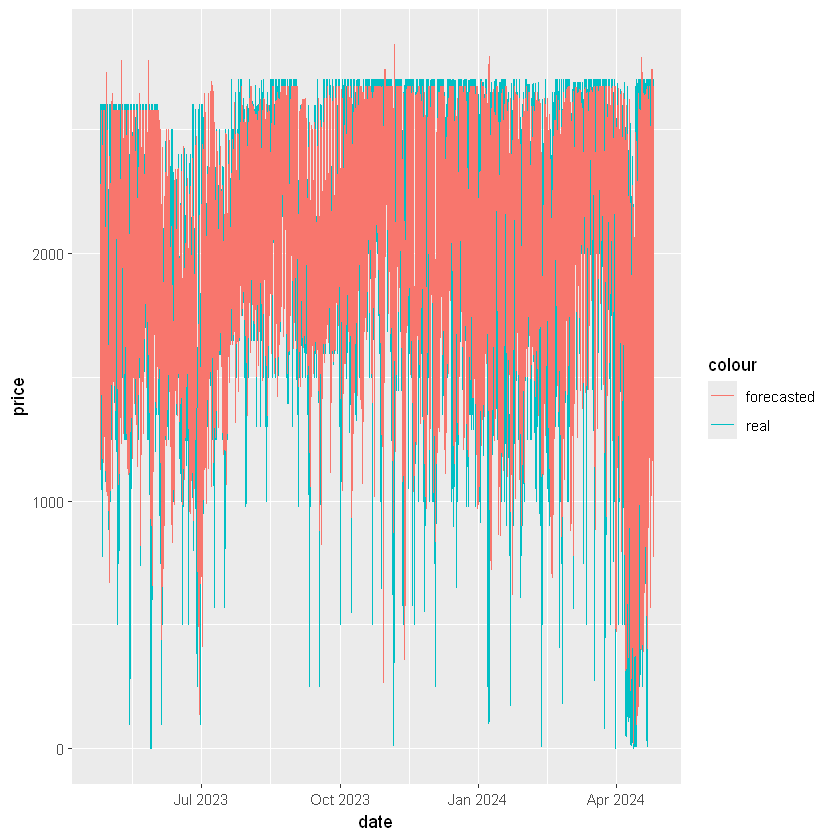

In [ ]:
ggplot(test_errors,aes(x=date)) + geom_line(aes(y=price,color='real'))+ geom_line(aes(y=forecasted,color='forecasted'))

In [ ]:
to_export <- na.omit(copy(data))

predictions <- predict(lm_model, newdata = to_export)

to_export[, forecasted := predictions]

head(to_export)
tail(to_export)

date,hour,price,priceUsd,priceEur,Price_Lag_24,Price_Lag_168,Tatil,forecast,Workday_24,Workday_168,forecasted
<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>
2021-01-14 00:00:00,00:00,319.81,42.87,35.26,309.00,300.00,1,27.4,1,1,361.9198
2021-01-14 01:00:00,01:00,318.60,42.70,35.13,275.01,309.99,1,30.1,1,1,349.7396
2021-01-14 02:00:00,02:00,316.21,42.38,34.87,294.99,269.24,1,37.3,1,1,340.5534
2021-01-14 03:00:00,03:00,313.66,42.04,34.58,243.99,264.99,1,41.0,1,1,313.2609
2021-01-14 04:00:00,04:00,313.50,42.02,34.57,254.88,247.03,1,52.6,1,1,310.2461
2021-01-14 05:00:00,05:00,313.13,41.97,34.53,310.07,247.03,1,67.9,1,1,337.6255


date,hour,price,priceUsd,priceEur,Price_Lag_24,Price_Lag_168,Tatil,forecast,Workday_24,Workday_168,forecasted
<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>
2024-04-25 18:00:00,18:00,2700,83.08,77.99,2700,2662.00,1,318.28,1,1,2655.063
2024-04-25 19:00:00,19:00,2700,83.08,77.99,2700,2700.00,1,264.01,1,1,2672.872
2024-04-25 20:00:00,20:00,2700,83.08,77.99,2700,2700.00,1,219.62,1,1,2672.872
2024-04-25 21:00:00,21:00,2700,83.08,77.99,2700,2700.00,1,191.99,1,1,2672.872
2024-04-25 22:00:00,22:00,2700,83.08,77.99,2700,2649.00,1,157.67,1,1,2648.970
2024-04-25 23:00:00,23:00,2700,83.08,77.99,2700,2320.89,1,134.85,1,1,2495.197


In [ ]:
library(data.table)

#fwrite(to_export, file = "PTF_PREDICTIONS.csv")


## 9 Linear Regression + Renew_ratio

In [13]:
data_path='data_new.csv'
data=fread(data_path)

data[,price_lag_24:=priceEur - Difference_24]
data[,price_lag_168:=priceEur - Difference_168]

head(data)
tail(data)

DateTime,renewable_ratio,priceEur,Difference_24,Difference_168,Workday,Workday_168,Workday_24,forecast,BV Forecast,price_lag_24,price_lag_168
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2021-01-14 00:00:00,0.04073709,35.26,1.16,2.17,1,1,1,27.4,4187.97,34.10,33.09
2021-01-14 01:00:00,0.04586432,35.13,4.79,0.94,1,1,1,30.1,3975.82,30.34,34.19
2021-01-14 02:00:00,0.05103432,34.87,2.32,5.17,1,1,1,37.3,3885.02,32.55,29.70
2021-01-14 03:00:00,0.05995258,34.58,7.66,5.35,1,1,1,41.0,3589.79,26.92,29.23
2021-01-14 04:00:00,0.06207705,34.57,6.45,7.32,1,1,1,52.6,3137.07,28.12,27.25
2021-01-14 05:00:00,0.07138521,34.53,0.32,7.28,1,1,1,67.9,2717.61,34.21,27.25


DateTime,renewable_ratio,priceEur,Difference_24,Difference_168,Workday,Workday_168,Workday_24,forecast,BV Forecast,price_lag_24,price_lag_168
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2024-04-25 18:00:00,0.11151240,77.99,0,0.67,1,1,1,318.28,5439.89,77.99,77.32
2024-04-25 19:00:00,0.10691880,77.99,0,-0.44,1,1,1,264.01,4703.63,77.99,78.43
2024-04-25 20:00:00,0.10165056,77.99,0,-0.44,1,1,1,219.62,4501.67,77.99,78.43
2024-04-25 21:00:00,0.10212468,77.99,0,-0.44,1,1,1,191.99,4394.75,77.99,78.43
2024-04-25 22:00:00,0.09613362,77.99,0,1.04,1,1,1,157.67,4235.98,77.99,76.95
2024-04-25 23:00:00,0.09804755,77.99,0,10.57,1,1,1,134.85,4053.30,77.99,67.42


In [14]:
data$DateTime <- as.POSIXct(data$DateTime)

head(data)

DateTime,renewable_ratio,priceEur,Difference_24,Difference_168,Workday,Workday_168,Workday_24,forecast,BV Forecast,price_lag_24,price_lag_168
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2021-01-14 00:00:00,0.04073709,35.26,1.16,2.17,1,1,1,27.4,4187.97,34.10,33.09
2021-01-14 01:00:00,0.04586432,35.13,4.79,0.94,1,1,1,30.1,3975.82,30.34,34.19
2021-01-14 02:00:00,0.05103432,34.87,2.32,5.17,1,1,1,37.3,3885.02,32.55,29.70
2021-01-14 03:00:00,0.05995258,34.58,7.66,5.35,1,1,1,41.0,3589.79,26.92,29.23
2021-01-14 04:00:00,0.06207705,34.57,6.45,7.32,1,1,1,52.6,3137.07,28.12,27.25
2021-01-14 05:00:00,0.07138521,34.53,0.32,7.28,1,1,1,67.9,2717.61,34.21,27.25


In [15]:
train_data <- data[DateTime < as.POSIXct("2023-04-25"), ]
test_data <- data[DateTime >= as.POSIXct("2023-04-25"), ]

lm_model <- lm(priceEur ~  price_lag_24 + price_lag_168 + Workday + Workday_24 + Workday_168 + renewable_ratio, data = train_data)

summary(lm_model)


Call:
lm(formula = priceEur ~ price_lag_24 + price_lag_168 + Workday + 
    Workday_24 + Workday_168 + renewable_ratio, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-204.277  -10.151   -1.578    8.591  156.260 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      1.995e+01  1.300e+00  15.337  < 2e-16 ***
price_lag_24     4.775e-01  5.023e-03  95.076  < 2e-16 ***
price_lag_168    4.814e-01  5.021e-03  95.874  < 2e-16 ***
Workday          1.851e+01  9.391e-01  19.708  < 2e-16 ***
Workday_24      -5.371e+00  9.470e-01  -5.671 1.44e-08 ***
Workday_168     -1.392e+01  8.617e-01 -16.157  < 2e-16 ***
renewable_ratio -1.304e+02  2.806e+00 -46.479  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 23.76 on 19934 degrees of freedom
Multiple R-squared:  0.8595,	Adjusted R-squared:  0.8595 
F-statistic: 2.032e+04 on 6 and 19934 DF,  p-value: < 2.2e-16


In [16]:
test_errors <- copy(test_data)

predictions <- predict(lm_model, newdata = test_data)

test_errors[, forecasted_price_eur := predictions]

residuals <- test_errors$priceEur - test_errors$forecasted_price_eur

mse <- mean(residuals^2)
mae <- mean(abs(residuals))
mape <- mean(abs(residuals)/((test_errors$priceEur)+0.000001))
wmape <- sum(abs(residuals))/sum(test_errors$priceEur)

print(mse)
print(mae)
print(mape)
print(wmape)


[1] 186.3594
[1] 10.38826
[1] 24741.64
[1] 0.1522571


In [ ]:
to_export <- na.omit(copy(data))

predictions <- predict(lm_model, newdata = to_export)

to_export[, forecasted_price_eur := predictions]

head(to_export)
tail(to_export)

DateTime,renewable_ratio,priceEur,Difference_24,Difference_168,Workday,Workday_168,Workday_24,forecast,BV Forecast,price_lag_24,price_lag_168,forecasted_price_eur
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2021-01-14 00:00:00,0.04073709,35.26,1.16,2.17,1,1,1,27.4,4187.97,34.10,33.09,46.06003
2021-01-14 01:00:00,0.04586432,35.13,4.79,0.94,1,1,1,30.1,3975.82,30.34,34.19,44.12539
2021-01-14 02:00:00,0.05103432,34.87,2.32,5.17,1,1,1,37.3,3885.02,32.55,29.70,42.34504
2021-01-14 03:00:00,0.05995258,34.58,7.66,5.35,1,1,1,41.0,3589.79,26.92,29.23,38.26724
2021-01-14 04:00:00,0.06207705,34.57,6.45,7.32,1,1,1,52.6,3137.07,28.12,27.25,37.61006
2021-01-14 05:00:00,0.07138521,34.53,0.32,7.28,1,1,1,67.9,2717.61,34.21,27.25,39.30430


DateTime,renewable_ratio,priceEur,Difference_24,Difference_168,Workday,Workday_168,Workday_24,forecast,BV Forecast,price_lag_24,price_lag_168,forecasted_price_eur
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2024-04-25 18:00:00,0.11151240,77.99,0,0.67,1,1,1,318.28,5439.89,77.99,77.32,79.08063
2024-04-25 19:00:00,0.10691880,77.99,0,-0.44,1,1,1,264.01,4703.63,77.99,78.43,80.21404
2024-04-25 20:00:00,0.10165056,77.99,0,-0.44,1,1,1,219.62,4501.67,77.99,78.43,80.90109
2024-04-25 21:00:00,0.10212468,77.99,0,-0.44,1,1,1,191.99,4394.75,77.99,78.43,80.83926
2024-04-25 22:00:00,0.09613362,77.99,0,1.04,1,1,1,157.67,4235.98,77.99,76.95,80.90812
2024-04-25 23:00:00,0.09804755,77.99,0,10.57,1,1,1,134.85,4053.30,77.99,67.42,76.07086


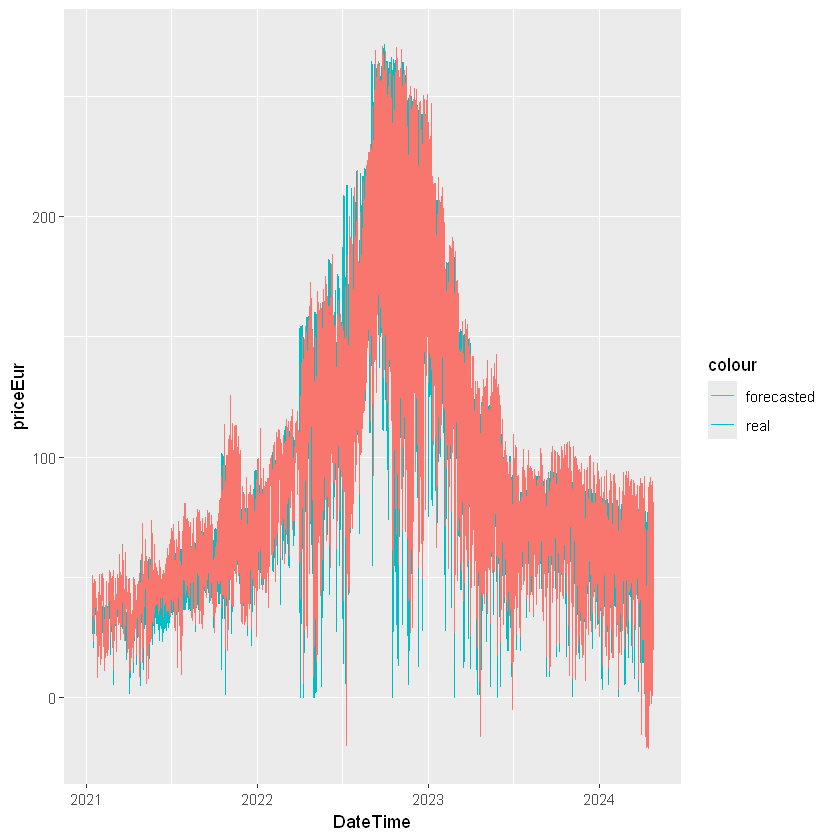

In [ ]:
ggplot(to_export,aes(x=DateTime)) + geom_line(aes(y=priceEur,color='real'))+ geom_line(aes(y=forecasted_price_eur,color='forecasted'))

In [ ]:
to_export[forecasted_price_eur < 0, forecasted_price_eur := 0]

tail(to_export)

DateTime,renewable_ratio,priceEur,Difference_24,Difference_168,Workday,Workday_168,Workday_24,forecast,BV Forecast,price_lag_24,price_lag_168,forecasted_price_eur
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2024-04-25 18:00:00,0.11151240,77.99,0,0.67,1,1,1,318.28,5439.89,77.99,77.32,79.08063
2024-04-25 19:00:00,0.10691880,77.99,0,-0.44,1,1,1,264.01,4703.63,77.99,78.43,80.21404
2024-04-25 20:00:00,0.10165056,77.99,0,-0.44,1,1,1,219.62,4501.67,77.99,78.43,80.90109
2024-04-25 21:00:00,0.10212468,77.99,0,-0.44,1,1,1,191.99,4394.75,77.99,78.43,80.83926
2024-04-25 22:00:00,0.09613362,77.99,0,1.04,1,1,1,157.67,4235.98,77.99,76.95,80.90812
2024-04-25 23:00:00,0.09804755,77.99,0,10.57,1,1,1,134.85,4053.30,77.99,67.42,76.07086


In [ ]:
fwrite(to_export, file = "MCP_PREDICTIONS.csv")

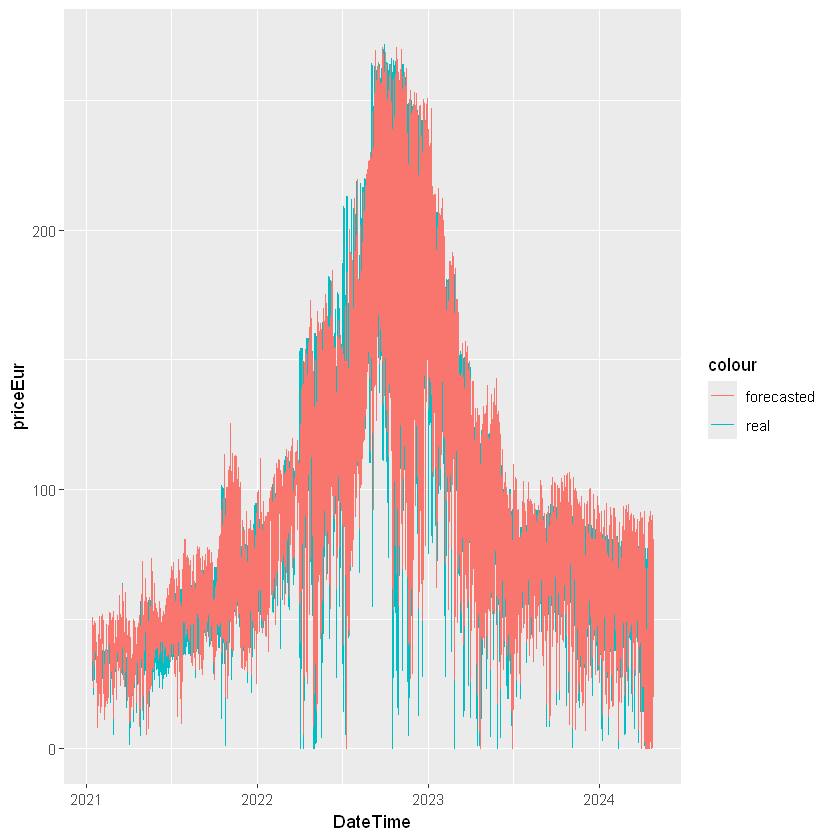

In [ ]:
ggplot(to_export,aes(x=DateTime)) + geom_line(aes(y=priceEur,color='real'))+ geom_line(aes(y=forecasted_price_eur,color='forecasted'))